# Exercise 2: Logistic Regression

## 1 Logistic Regression

In this part of the exercise, you will build a logistic regression model to predict whether a student gets admitted into a university. Suppose that you are the administrator of a university department and you want to determine each applicant’s chance of admission based on their results on two exams. You have historical data from previous applicants that you can use as a training set for logistic regression. For each training example, you have the applicant’s scores on two exams and the admissions decision. Your task is to build a classification model that estimates an applicant’s probability of admission based the scores from those two exams.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import utils

### 1.1 Visualizing the data

In [2]:
data = pd.read_csv("./input/ex2data1.txt", header=None)
data.head()

,0,1,2
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [3]:
data[data.iloc[:, 2]==0]
def plotData(X, y):
    """
    Plots the data points X and y into a new figure. Plots the data 
    points with * for the positive examples and o for the negative examples.
    
    Parameters
    ----------
    X : array_like
        An Mx2 matrix representing the dataset. 
    
    y : array_like
        Label values for the dataset. A vector of size (M, ).
    
    Instructions
    ------------
    Plot the positive and negative examples on a 2D plot, using the
    option 'k*' for the positive examples and 'ko' for the negative examples.    
    """
    # Create New Figure
    fig = plt.figure()
    ad = X[y == 1]
    rej = X[y == 0]
    # ====================== YOUR CODE HERE ======================
    plt.plot(ad[0], ad[1], "k*")
    plt.plot(rej[0], rej[1], "ko", mfc='y')
    
    # ============================================================

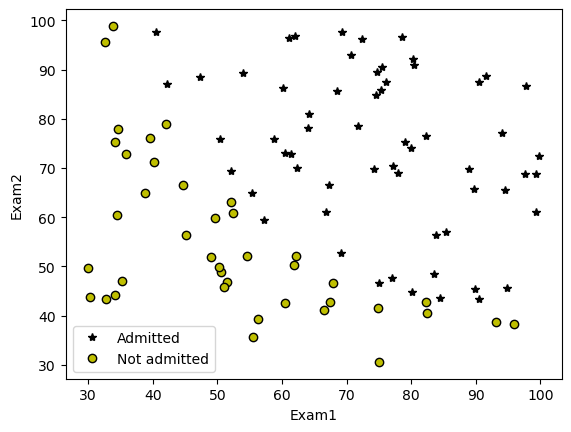

In [4]:
X, y = data.iloc[:, 0:2], data.iloc[:,2]
plotData(X, y)
plt.xlabel("Exam1")
plt.ylabel("Exam2")
plt.legend(["Admitted", "Not admitted"])

### 1.2 Implementation

#### 1.2.1 Sigmoid function

$g(z) = \frac{1}{(1 + e^{-z})}$

In [5]:
def sigmoid(z):
    """
    Compute sigmoid function given the input z.
    
    Parameters
    ----------
    z : array_like
        The input to the sigmoid function. This can be a 1-D vector 
        or a 2-D matrix. 
    
    Returns
    -------
    g : array_like
        The computed sigmoid function. g has the same shape as z, since
        the sigmoid is computed element-wise on z.
        
    Instructions
    ------------
    Compute the sigmoid of each value of z (z can be a matrix, vector or scalar).
    """
    # convert input to a numpy array
    z = np.array(z)
    
    # You need to return the following variables correctly 
    g = np.zeros(z.shape)

    # ====================== YOUR CODE HERE ======================
    g = 1 / (1 + np.exp(-z))
    ## note the difference between math.exp() and np.exp()
    # =============================================================
    return g

In [6]:
# test
sigmoid(0)

0.5

#### 1.2.2 Cost function and gradient

$J(\theta) = \frac{1}{m}\Sigma^{m}_{i=1}[-y^{(i)}log(h_{\theta}(x^{(i)}))-(1-y^{(i)})log(1-h_{\theta}(x^{(i)}))]$

gradient: the partial derivative

$\frac{\partial J(\theta)}{\partial \theta_j}=\frac{1}{m}\Sigma^{m}_{i=1}(h_{\theta}(x^{(i)}) - y(i))x_j^{(i)}$

In [7]:
def costFunction(theta, X, y):
    """
    Compute cost and gradient for logistic regression. 
    
    Parameters
    ----------
    theta : array_like
        The parameters for logistic regression. This a vector
        of shape (n+1, ).
    
    X : array_like
        The input dataset of shape (m x n+1) where m is the total number
        of data points and n is the number of features. We assume the 
        intercept has already been added to the input.
    
    y : arra_like
        Labels for the input. This is a vector of shape (m, ).
    
    Returns
    -------
    J : float
        The computed value for the cost function. 
    
    grad : array_like
        A vector of shape (n+1, ) which is the gradient of the cost
        function with respect to theta, at the current values of theta.
        
    Instructions
    ------------
    Compute the cost of a particular choice of theta. You should set J to 
    the cost. Compute the partial derivatives and set grad to the partial
    derivatives of the cost w.r.t. each parameter in theta.
    """
    # Initialize some useful values
    # m = y.size  # number of training examples
    (m, n) = X.shape
    # You need to return the following variables correctly 
    J = 0
    grad = np.zeros(theta.shape)
    h_x = sigmoid(X @ theta)
    # ====================== EXAMPLE CODE ======================
    # J = 1/m * np.sum(-y * np.log(h_x) - (1-y) * np.log(1-h_x))
    # grad = 1/m * np.sum(((h_x - y) * X.T).T, axis=0)
    # ====================== YOUR CODE HERE ======================
    
    # J = (-y @ (np.log(h_x)) - (np.ones(m) - y) @ (np.log(h_x))) / m
    ## wrong formula above, forgot log(1-h(x))
    J = (-y @ (np.log(h_x)) - (np.ones(m) - y) @ (np.log(np.ones(m) - h_x))) / m
    # ## not vectorized
    # temp = [0] * n
    # for j in range(n):
    #     temp[j] = ((sigmoid(X @ theta) - y) @ X.iloc[:,j]) / m
    # grad = np.array(temp)
    ## fully vectorized
    grad = ((h_x - y).T @ X) / m
    # =============================================================
    return J, grad

In [8]:
newname = "x_0"
if newname not in X.columns: X.insert(0, newname, np.ones(y.shape))
theta = np.zeros(X.shape[1])
J, grad = costFunction(theta, X, y)
J

0.6931471805599453

In [9]:
grad

x_0    -0.100000
0     -12.009217
1     -11.262842
Name: 2, dtype: float64

In [10]:
## test non-zero theta
test_theta = np.array([-24, 0.2, 0.2])
cost, grad = costFunction(test_theta, X, y)

In [11]:
cost

0.21833019382659777

In [12]:
grad

x_0    0.042903
0      2.566234
1      2.646797
Name: 2, dtype: float64

#### 1.2.3 Learning Parameters using `scipy.optimize`

In the previous assignment, you found the optimal parameters of a linear regression model by implementing gradient descent. You wrote a cost function and calculated its gradient, then took a gradient descent step accordingly. This time, instead of taking gradient descent steps, you will use the `scipy.optimize` module. 

In [13]:
from scipy import optimize

In [14]:
# set options for optimize.minimize
# options= {"maxiter": 400}
options= {"maxfun": 400}

# see documention for scipy's optimize.minimize  for description about
# the different parameters
# The function returns an object `OptimizeResult`
# We use truncated Newton algorithm for optimization which is 
# equivalent to MATLAB's fminunc
# See https://stackoverflow.com/questions/18801002/fminunc-alternate-in-numpy
res = optimize.minimize(costFunction,
                        np.zeros(X.shape[1]),
                        (X, y),
                        jac=True,
                        method='TNC',
                        options=options)

# the fun property of `OptimizeResult` object returns
# the value of costFunction at optimized theta
cost = res.fun

# the optimized theta is in the x property
theta = res.x

# Print theta to screen
print('Cost at theta found by optimize.minimize: {:.3f}'.format(cost))
print('Expected cost (approx): 0.203\n');

print('theta:')
print('\t[{:.3f}, {:.3f}, {:.3f}]'.format(*theta))
print('Expected theta (approx):\n\t[-25.161, 0.206, 0.201]')

Cost at theta found by optimize.minimize: 0.203
Expected cost (approx): 0.203

theta:
	[-25.161, 0.206, 0.201]
Expected theta (approx):
	[-25.161, 0.206, 0.201]


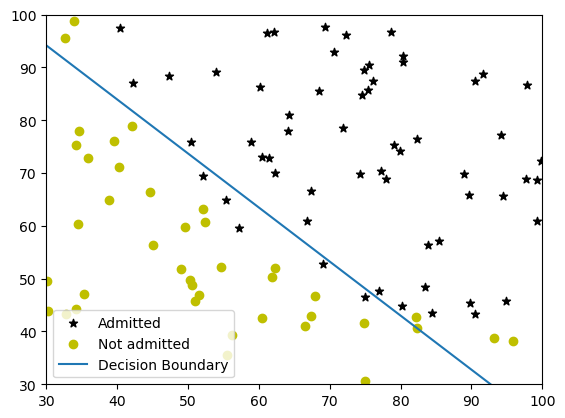

In [15]:
def plotData_(X, y):
    """
    X is a numpy data structure
    """
    fig = plt.figure()
    pos = y == 1
    neg = y == 0
    plt.scatter(X[pos, 0], X[pos, 1], c="black", marker='*')
    plt.scatter(X[neg, 0], X[neg, 1], c='y')

utils.plotDecisionBoundary(plotData_, theta, X.to_numpy(), y)

#### 1.2.4 Evaluating logistic regression

In [16]:
def predict(theta, X):
    """
    Predict whether the label is 0 or 1 using learned logistic regression.
    Computes the predictions for X using a threshold at 0.5 
    (i.e., if sigmoid(theta.T*x) >= 0.5, predict 1)
    
    Parameters
    ----------
    theta : array_like
        Parameters for logistic regression. A vecotor of shape (n+1, ).
    
    X : array_like
        The data to use for computing predictions. The rows is the number 
        of points to compute predictions, and columns is the number of
        features.

    Returns
    -------
    p : array_like
        Predictions and 0 or 1 for each row in X. 
    
    Instructions
    ------------
    Complete the following code to make predictions using your learned 
    logistic regression parameters.You should set p to a vector of 0's and 1's    
    """
    m = X.shape[0] # Number of training examples

    # You need to return the following variables correctly
    p = np.zeros(m)

    # ====================== YOUR CODE HERE ======================
    p = list(map(int, (sigmoid(X @ theta) >= 0.5).tolist()))
    # ============================================================
    return p

In [17]:
p = predict(theta, X)
print('Train Accuracy: {:.2f} %'.format(np.mean(p == y) * 100))
print('Expected accuracy (approx): 89.00 %')

Train Accuracy: 89.00 %
Expected accuracy (approx): 89.00 %


predict for a student: exam1: 45, exam2: 85

In [18]:
prob = sigmoid(theta @ np.array([1, 45, 85]))
print('For a student with scores 45 and 85,'
      'we predict an admission probability of {:.3f}'.format(prob))
print('Expected value: 0.775 +/- 0.002\n')

For a student with scores 45 and 85,we predict an admission probability of 0.776
Expected value: 0.775 +/- 0.002



## 2. Regularized logistic regression

In this part of the exercise, you will implement regularized logistic regression to predict whether microchips from a fabrication plant passes quality assurance (QA). During QA, each microchip goes through various tests to ensure it is functioning correctly. Suppose you are the product manager of the factory and you have the test results for some microchips on two different tests. From these two tests, you would like to determine whether the microchips should be accepted or rejected. To help you make the decision, you have a dataset of test results on past microchips, from which you can build a logistic regression model.

In [19]:
# data = np.loadtxt("./input/ex2data2.txt", delimiter=',')
data = pd.read_csv("./input/ex2data2.txt", header=None)
X = data.iloc[:, 0:2]
y = data.iloc[:, 2]
X_num = X.to_numpy()
y_num = y.to_numpy()

### 2.1 Visualize the data

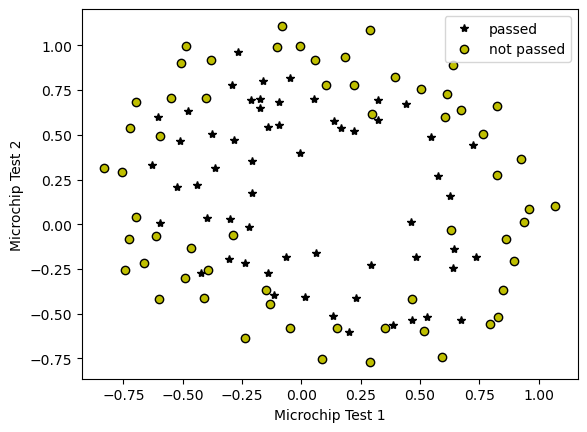

In [20]:
plotData(X, y)
plt.xlabel("Microchip Test 1")
plt.ylabel("Microchip Test 2")
plt.legend(["passed", "not passed"])

### 2.2 Feature mapping

One way to fit the data better is to create more features from each data
point.

In [21]:
X_num = utils.mapFeature(X_num[:, 0], X_num[:, 1])

In [22]:
X_num.shape

(118, 28)

In [23]:
## convert to pandas DataFrame
X = pd.DataFrame(X_num)
X.shape

(118, 28)

### 2.3 Cost function and gradient

$J(\theta) = \frac{1}{m}\Sigma^{m}_{i=1}[-y^{(i)}log(h_{\theta}(x^{(i)}))-(1-y^{(i)})log(1-h_{\theta}(x^{(i)}))] + \frac{\lambda}{2m}\Sigma^n_{k=1}\theta^2_k$

$\frac{\partial J(\theta)}{\partial \theta_j}=\frac{1}{m}\Sigma^{m}_{i=1}(h_{\theta}(x^{(i)}) - y(i))x_j^{(i)}$ for $j=0$

$\frac{\partial J(\theta)}{\partial \theta_j}=(\frac{1}{m}\Sigma^{m}_{i=1}(h_{\theta}(x^{(i)}) - y(i))x_j^{(i)})+\frac{\lambda}{m}\theta_j$ for $j\geq1$

In [24]:
def costFunctionReg(theta, X, y, lambda_):
    """
    Compute cost and gradient for logistic regression with regularization.
    
    Parameters
    ----------
    theta : array_like
        Logistic regression parameters. A vector with shape (n, ). n is 
        the number of features including any intercept. If we have mapped
        our initial features into polynomial features, then n is the total 
        number of polynomial features. 
    
    X : array_like
        The data set with shape (m x n). m is the number of examples, and
        n is the number of features (after feature mapping).
    
    y : array_like
        The data labels. A vector with shape (m, ).
    
    lambda_ : float
        The regularization parameter. 
    
    Returns
    -------
    J : float
        The computed value for the regularized cost function. 
    
    grad : array_like
        A vector of shape (n, ) which is the gradient of the cost
        function with respect to theta, at the current values of theta.
    
    Instructions
    ------------
    Compute the cost `J` of a particular choice of theta.
    Compute the partial derivatives and set `grad` to the partial
    derivatives of the cost w.r.t. each parameter in theta.
    """
    # Initialize some useful values
    m = y.size  # number of training examples

    # You need to return the following variables correctly 
    J = 0
    grad = np.zeros(theta.shape)
    (m, n) = X.shape
    theta_reg = theta.copy()
    ## for regularization term, k starts from 1
    theta_reg[0] = 0
    # ===================== YOUR CODE HERE ======================
    h_x = sigmoid(X @ theta)
    J = (-y @ (np.log(h_x)) - (np.ones(m) - y) @ (np.log(np.ones(m) - h_x))) / m +\
        lambda_ / (2 * m) * (theta_reg @ theta_reg)
    # ## not vectorized
    # temp = [0] * n
    # temp[0] = ((sigmoid(X @ theta) - y) @ X.iloc[:,0]) / m
    # for j in range(1, n):
    #     temp[j] = ((sigmoid(X @ theta) - y) @ X.iloc[:,j]) / m + lambda_ / m * theta[j]
    # grad = np.array(temp)
    ## fully vectorized
    grad = ((h_x - y).T @ X) / m + lambda_ / m * theta_reg
    
    # =============================================================
    return J, grad

In [25]:
cost, grad = costFunctionReg(np.zeros(X.shape[1]), X, y, 1)
print('Cost at initial theta (zeros): {:.3f}'.format(cost))
print('Expected cost (approx)       : 0.693\n')

print('Gradient at initial theta (zeros) - first five values only:')
print('\t[{:.4f}, {:.4f}, {:.4f}, {:.4f}, {:.4f}]'.format(*grad[:5]))
print('Expected gradients (approx) - first five values only:')
print('\t[0.0085, 0.0188, 0.0001, 0.0503, 0.0115]\n')

Cost at initial theta (zeros): 0.693
Expected cost (approx)       : 0.693

Gradient at initial theta (zeros) - first five values only:
	[0.0085, 0.0188, 0.0001, 0.0503, 0.0115]
Expected gradients (approx) - first five values only:
	[0.0085, 0.0188, 0.0001, 0.0503, 0.0115]



In [26]:
test_theta = np.ones(X.shape[1])
cost, grad = costFunctionReg(test_theta, X, y, 10)

print('------------------------------\n')
print('Cost at test theta    : {:.2f}'.format(cost))
print('Expected cost (approx): 3.16\n')

print('Gradient at initial theta (zeros) - first five values only:')
print('\t[{:.4f}, {:.4f}, {:.4f}, {:.4f}, {:.4f}]'.format(*grad[:5]))
print('Expected gradients (approx) - first five values only:')
print('\t[0.3460, 0.1614, 0.1948, 0.2269, 0.0922]')

------------------------------

Cost at test theta    : 3.16
Expected cost (approx): 3.16

Gradient at initial theta (zeros) - first five values only:
	[0.3460, 0.1614, 0.1948, 0.2269, 0.0922]
Expected gradients (approx) - first five values only:
	[0.3460, 0.1614, 0.1948, 0.2269, 0.0922]


#### 2.3.1 Learning parameters using `scipy.optimize.minimize`

In [27]:
options= {"maxfun": 100}
lambda_ = 1
res = optimize.minimize(costFunctionReg,
                        np.zeros(X.shape[1]),
                        (X, y, lambda_),
                        jac=True,
                        method='TNC',
                        options=options)
cost = res.fun
theta = res.x

### 2.4 Plotting the decision boundary

/home/jovyan/ml/intro-to-ml/ex2/utils.py:45: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(out)


Text(0.5, 1.0, 'lambda = 1.00')

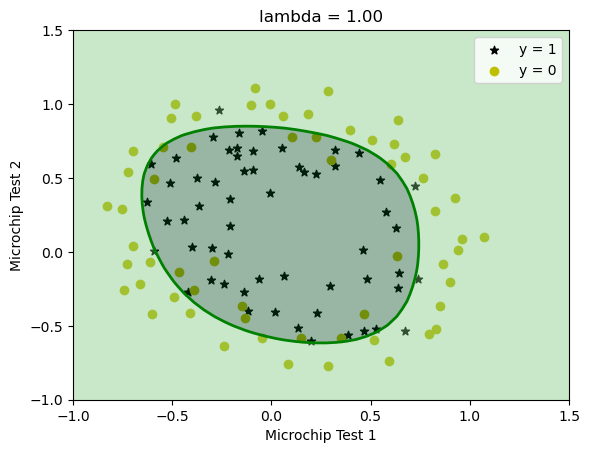

In [28]:
utils.plotDecisionBoundary(plotData_, theta, X.to_numpy(), y)
plt.xlabel('Microchip Test 1')
plt.ylabel('Microchip Test 2')
plt.legend(['y = 1', 'y = 0'])
plt.grid(False)
plt.title('lambda = %0.2f' % lambda_)

In [29]:
p = predict(theta, X)

print('Train Accuracy: %.1f %%' % (np.mean(p == y) * 100))
print('Expected accuracy (with lambda = 1): 83.1 % (approx)\n')

Train Accuracy: 83.1 %
Expected accuracy (with lambda = 1): 83.1 % (approx)



### 2.5 Optional (ungraded) exercies

In this part of the exercise, you will get to try out different regularization parameters for the dataset to understand how regularization prevents overfitting.

Notice the changes in the decision boundary as you vary $\lambda$. With a small $\lambda$, you should find that the classifier gets almost every training example correct, but draws a very complicated boundary, thus overfitting the data. See the following figures for the decision boundaries you should get for different values of $\lambda$.

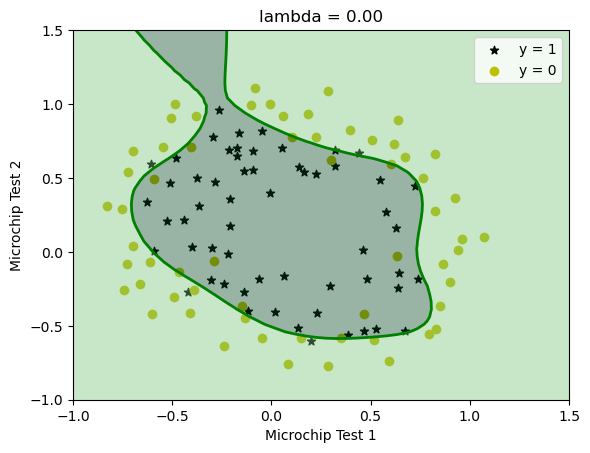

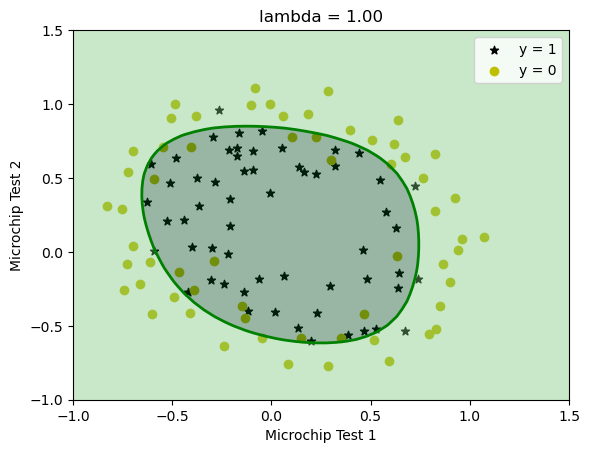

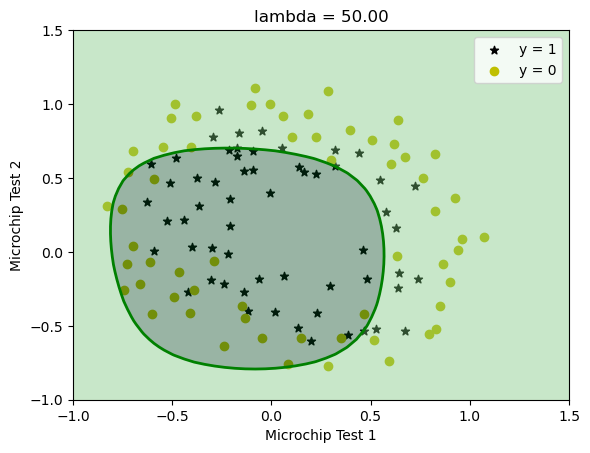

In [30]:
lambdas = [0, 1, 50]
for l in lambdas:
    res = optimize.minimize(costFunctionReg, np.zeros(X.shape[1]),
                            (X, y, l),
                            jac=True,
                            method="TNC",
                            options=options)
    cost = res.fun
    theta = res.x
    utils.plotDecisionBoundary(plotData_, theta, X.to_numpy(), y)
    plt.xlabel('Microchip Test 1')
    plt.ylabel('Microchip Test 2')
    plt.legend(['y = 1', 'y = 0'])
    plt.grid(False)
    plt.title('lambda = %0.2f' % l)